# Importation

In [23]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import spacy


In [24]:
# df = pd.read_csv('../data/corpus.csv')

# Séparation test et entrainement

In [25]:
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# train_df.to_csv('../data/train.csv', index=False)
# test_df.to_csv('../data/test.csv', index=False)


### Ouvrir les csv qui ont déjà été divisés

In [26]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

# Baseline 

### Prédiction aléatoire

In [27]:
def random_prediction():
    return random.choice(['Plat principal', 'Entrée', 'Dessert'])

test_df['random y_pred_spacy'] = test_df.apply(lambda x: random_y_pred_spacy(), axis=1)


### Prédiction classe majoritaire

In [28]:
def main_class_prediction(train_df):
    main_type = train_df['type'].mode()    
    return main_type

main_type = main_class_prediction(train_df)
test_df['main class prediction'] = test_df.apply(lambda x: main_type, axis=1)

# Model

### SKlearn + Tfi-Df

In [29]:
x_train = train_df['recette']
y_train = train_df['type']

model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())

model1.fit(x_train, y_train)

y_pred_Sklearn = model1.predict(test_df['recette'])

test_df['Tfi-Df prediction'] = y_pred_Sklearn

y_test = test_df['type']

### Spacy

In [30]:
nlp = spacy.load("fr_core_news_sm")

def spacy_tokenizer(text):
    tokens = nlp(text)
    return [token.lemma_ for token in tokens if not token.is_punct and not token.is_stop]

model2 = make_pipeline(TfidfVectorizer(tokenizer=spacy_tokenizer), SVC())

model2.fit(x_train, y_train)

y_pred_spacy = model2.predict(test_df['recette'])

test_df['Spacy prediction'] = y_pred_spacy


c:\Users\Nicolas\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# Résultat

### Random Prediction

Matrice de Confusion : 
      0    1    2
0  225  249  252
1  188  205  218
2  402  373  383


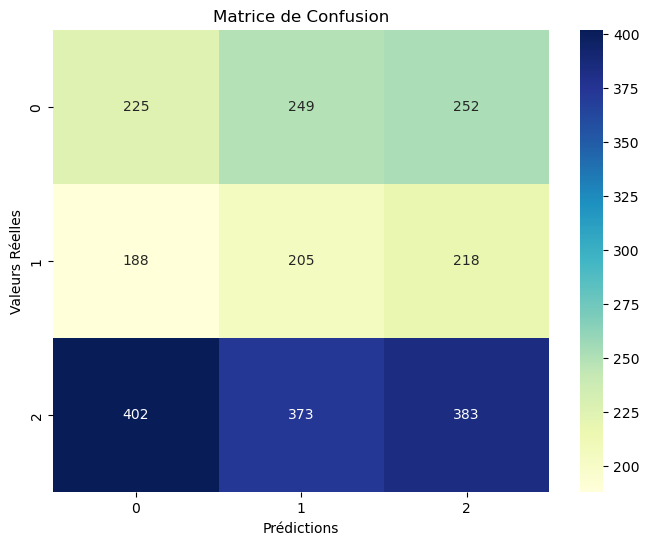

                precision    recall  f1-score   support

       Dessert       0.28      0.31      0.29       726
        Entrée       0.25      0.34      0.29       611
Plat principal       0.45      0.33      0.38      1158

      accuracy                           0.33      2495
     macro avg       0.32      0.33      0.32      2495
  weighted avg       0.35      0.33      0.33      2495



In [ ]:
y_rand = test_df['random prediction']

conf_matrix = confusion_matrix(y_test, y_rand)

conf_df = pd.DataFrame(conf_matrix)

print("Matrice de Confusion : \n", conf_df)

plt.figure(figsize=(8,6))
sns.heatmap(conf_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

# Rappel - Precision - F1-score

report = classification_report(y_test, y_rand)
print(report)

### Main Class Prediction

Matrice de Confusion : 
    0  1     2
0  0  0   726
1  0  0   611
2  0  0  1158


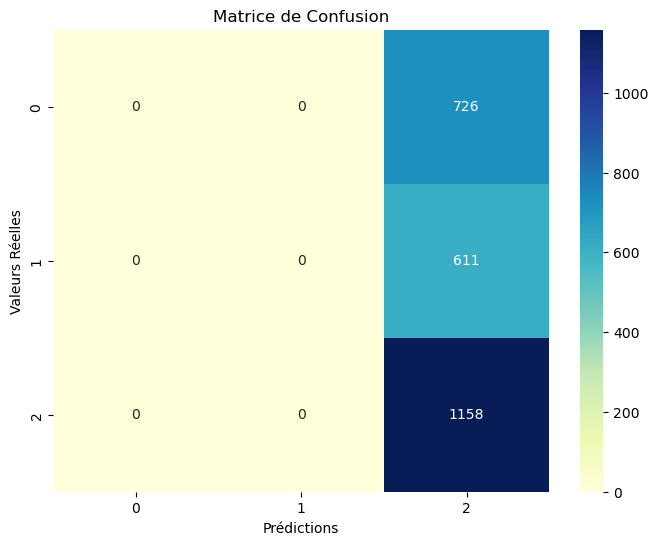

                precision    recall  f1-score   support

       Dessert       0.00      0.00      0.00       726
        Entrée       0.00      0.00      0.00       611
Plat principal       0.46      1.00      0.63      1158

      accuracy                           0.46      2495
     macro avg       0.15      0.33      0.21      2495
  weighted avg       0.22      0.46      0.29      2495



c:\Users\Nicolas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nicolas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nicolas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_main = test_df['main class prediction']

conf_matrix = confusion_matrix(y_test, y_main)

conf_df = pd.DataFrame(conf_matrix)

print("Matrice de Confusion : \n", conf_df)

plt.figure(figsize=(8,6))
sns.heatmap(conf_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

# Rappel - Precision - F1-score

report = classification_report(y_test, y_main)
print(report)

### Sklearn + Tfi-DF

Matrice de Confusion : 
                 Dessert  Entrée  Plat principal
Dessert             700       0              26
Entrée               20      35             556
Plat principal        8       6            1144


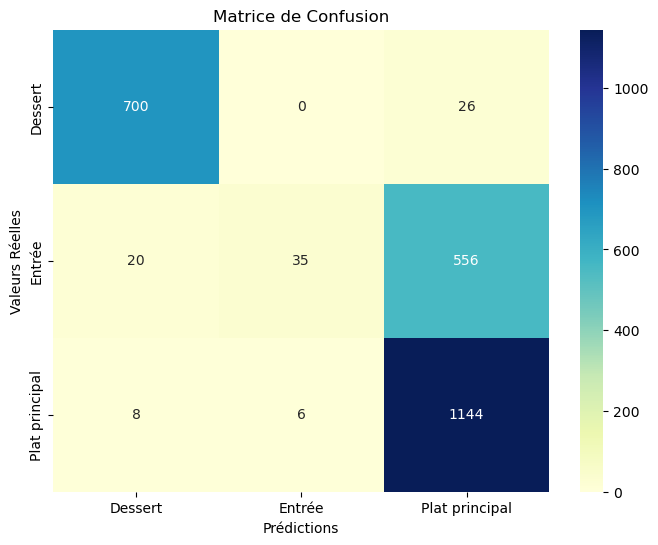

                precision    recall  f1-score   support

       Dessert       0.96      0.96      0.96       726
        Entrée       0.85      0.06      0.11       611
Plat principal       0.66      0.99      0.79      1158

      accuracy                           0.75      2495
     macro avg       0.83      0.67      0.62      2495
  weighted avg       0.80      0.75      0.67      2495



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_Sklearn)

conf_df = pd.DataFrame(conf_matrix, index=model1.classes_, columns=model1.classes_)

print("Matrice de Confusion : \n", conf_df)

plt.figure(figsize=(8,6))
sns.heatmap(conf_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

# Rappel - Precision - F1-score

report = classification_report(y_test, y_pred_Sklearn)
print(report)

### Spacy

Matrice de Confusion : 
                 Dessert  Entrée  Plat principal
Dessert             723       1               2
Entrée               13     378             220
Plat principal        6     101            1051


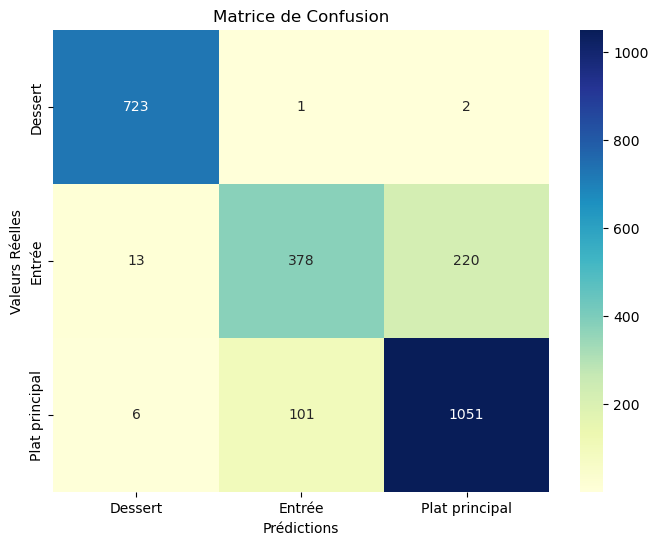

                precision    recall  f1-score   support

       Dessert       0.97      1.00      0.99       726
        Entrée       0.79      0.62      0.69       611
Plat principal       0.83      0.91      0.86      1158

      accuracy                           0.86      2495
     macro avg       0.86      0.84      0.85      2495
  weighted avg       0.86      0.86      0.86      2495



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_spacy)

conf_df = pd.DataFrame(conf_matrix, index=model2.classes_, columns=model2.classes_)

print("Matrice de Confusion : \n", conf_df)

plt.figure(figsize=(8,6))
sns.heatmap(conf_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

# Rappel - Precision - F1-score

report = classification_report(y_test, y_pred_spacy)
print(report)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Compute evaluation metrics
accuracy = accuracy_score(test_df["type"], y_pred_spacy)
precision = precision_score(test_df["type"], y_pred_spacy, average='weighted')
recall = recall_score(test_df["type"], y_pred_spacy, average='weighted')
f1 = f1_score(test_df["type"], y_pred_spacy, average='weighted')
conf_matrix = confusion_matrix(test_df["type"], y_pred_spacy)
class_report = classification_report(test_df["type"], y_pred_spacy)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

,doc_id,titre,type,difficulte,cout,ingredients,recette,random prediction,main class prediction,Tfi-Df prediction,Spacy prediction
0,recette_169081.xml,Tarte poireaux saumon Philadelphia,Plat principal,Facile,Moyen,- 3 beaux poireaux - 100 à 150 g de saumon fum...,Faire cuire à blanc la pâte brisée : 5 à 7 min...,Entrée,Plat principal,Plat principal,Plat principal
1,recette_56542.xml,Gratin de pommes de terre complet,Plat principal,Très facile,Bon marché,- 10 pommes de terre - 10 tranches lard détail...,Cuire les pommes de terre à l'eau bouillante. ...,Plat principal,Plat principal,Plat principal,Plat principal
2,recette_90821.xml,Charlotte aux fraises facile,Dessert,Facile,Moyen,- 450 g de fraises - 30 biscuits cuillers - 50...,Mettre au congélateur pendant 30 minutes mini ...,Entrée,Plat principal,Dessert,Dessert
3,recette_56075.xml,Tarte aux poires et verveine,Dessert,Très facile,Bon marché,- 3 belles poires - 1 pâte feuilletée - 20 cl ...,Préchauffer le four thermostat 7 (210°C). Prép...,Plat principal,Plat principal,Dessert,Dessert
4,recette_27524.xml,Tarte à la compote de rhubarbe et poudre d'ama...,Dessert,Facile,Moyen,- 1 pâte brisée - 500 g de rhubarbe - 100 g de...,EPlez et coupez la rhubarbe en morceaux. Faite...,Plat principal,Plat principal,Dessert,Dessert
...,...,...,...,...,...,...,...,...,...,...,...
95,recette_171683.xml,Croque-biquette,Plat principal,Très facile,Bon marché,- 8 tranches de pain de mie extra-moelleuses -...,Tartiner toutes les tranches de pain de mie de...,Plat principal,Plat principal,Plat principal,Plat principal
96,recette_18864.xml,Petits muffins d'automne aux myrtilles,Dessert,Très facile,Bon marché,- 1 yaourt nature (conserver le pot comme mesu...,Préchauffer votre four à 160°C. Mélanger tous ...,Plat principal,Plat principal,Dessert,Dessert
97,recette_164748.xml,Épaule d'agneau sucrée,Plat principal,Facile,Moyen,- 1 épaule d'agneau - 1 l de vin blanc moelleu...,Faire dorer dans une cocotte l'épaule d'agneau...,Plat principal,Plat principal,Plat principal,Plat principal
98,recette_55951.xml,Galette poitevine,Dessert,Très facile,Bon marché,- 2 oeufs - 250 g de beurre doux des Deux Sèvr...,Préchauffer le four. Battre très vigureusement...,Entrée,Plat principal,Dessert,Dessert
